## Importing the Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
data = pd.read_csv('Downloads/winequality-red.csv')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis

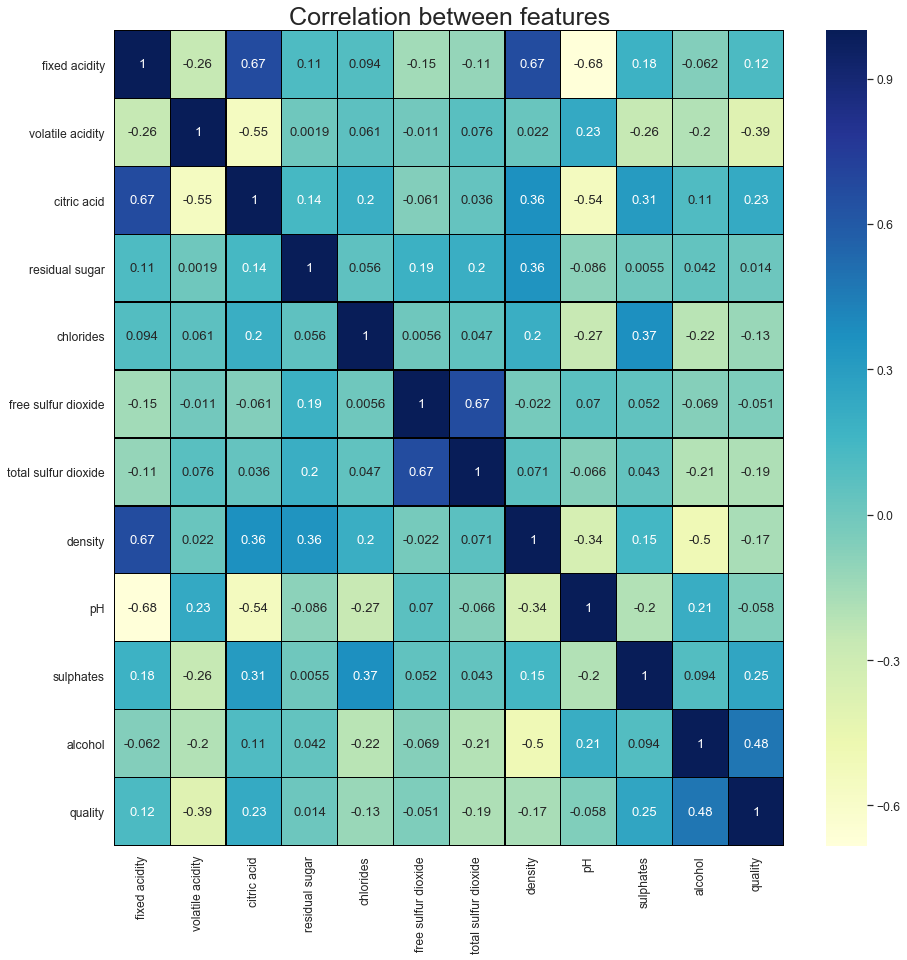

In [40]:
corr = data.corr()
sns.set(font_scale = 1.10)
fig = plt.subplots(figsize = (15,15))
sns.heatmap(corr, cmap ='YlGnBu', linecolor = 'black', annot = True, linewidths = 0.25)
plt.title('Correlation between features').set_size(25)

In [10]:
data.isnull().all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [34]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Quality Variable Analysis')

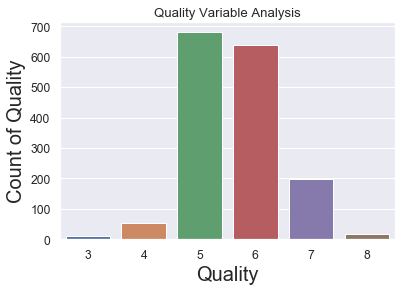

In [26]:
sns.countplot(data['quality'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Count of Quality').set_size(20)
plt.title('Quality Variable Analysis')

C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


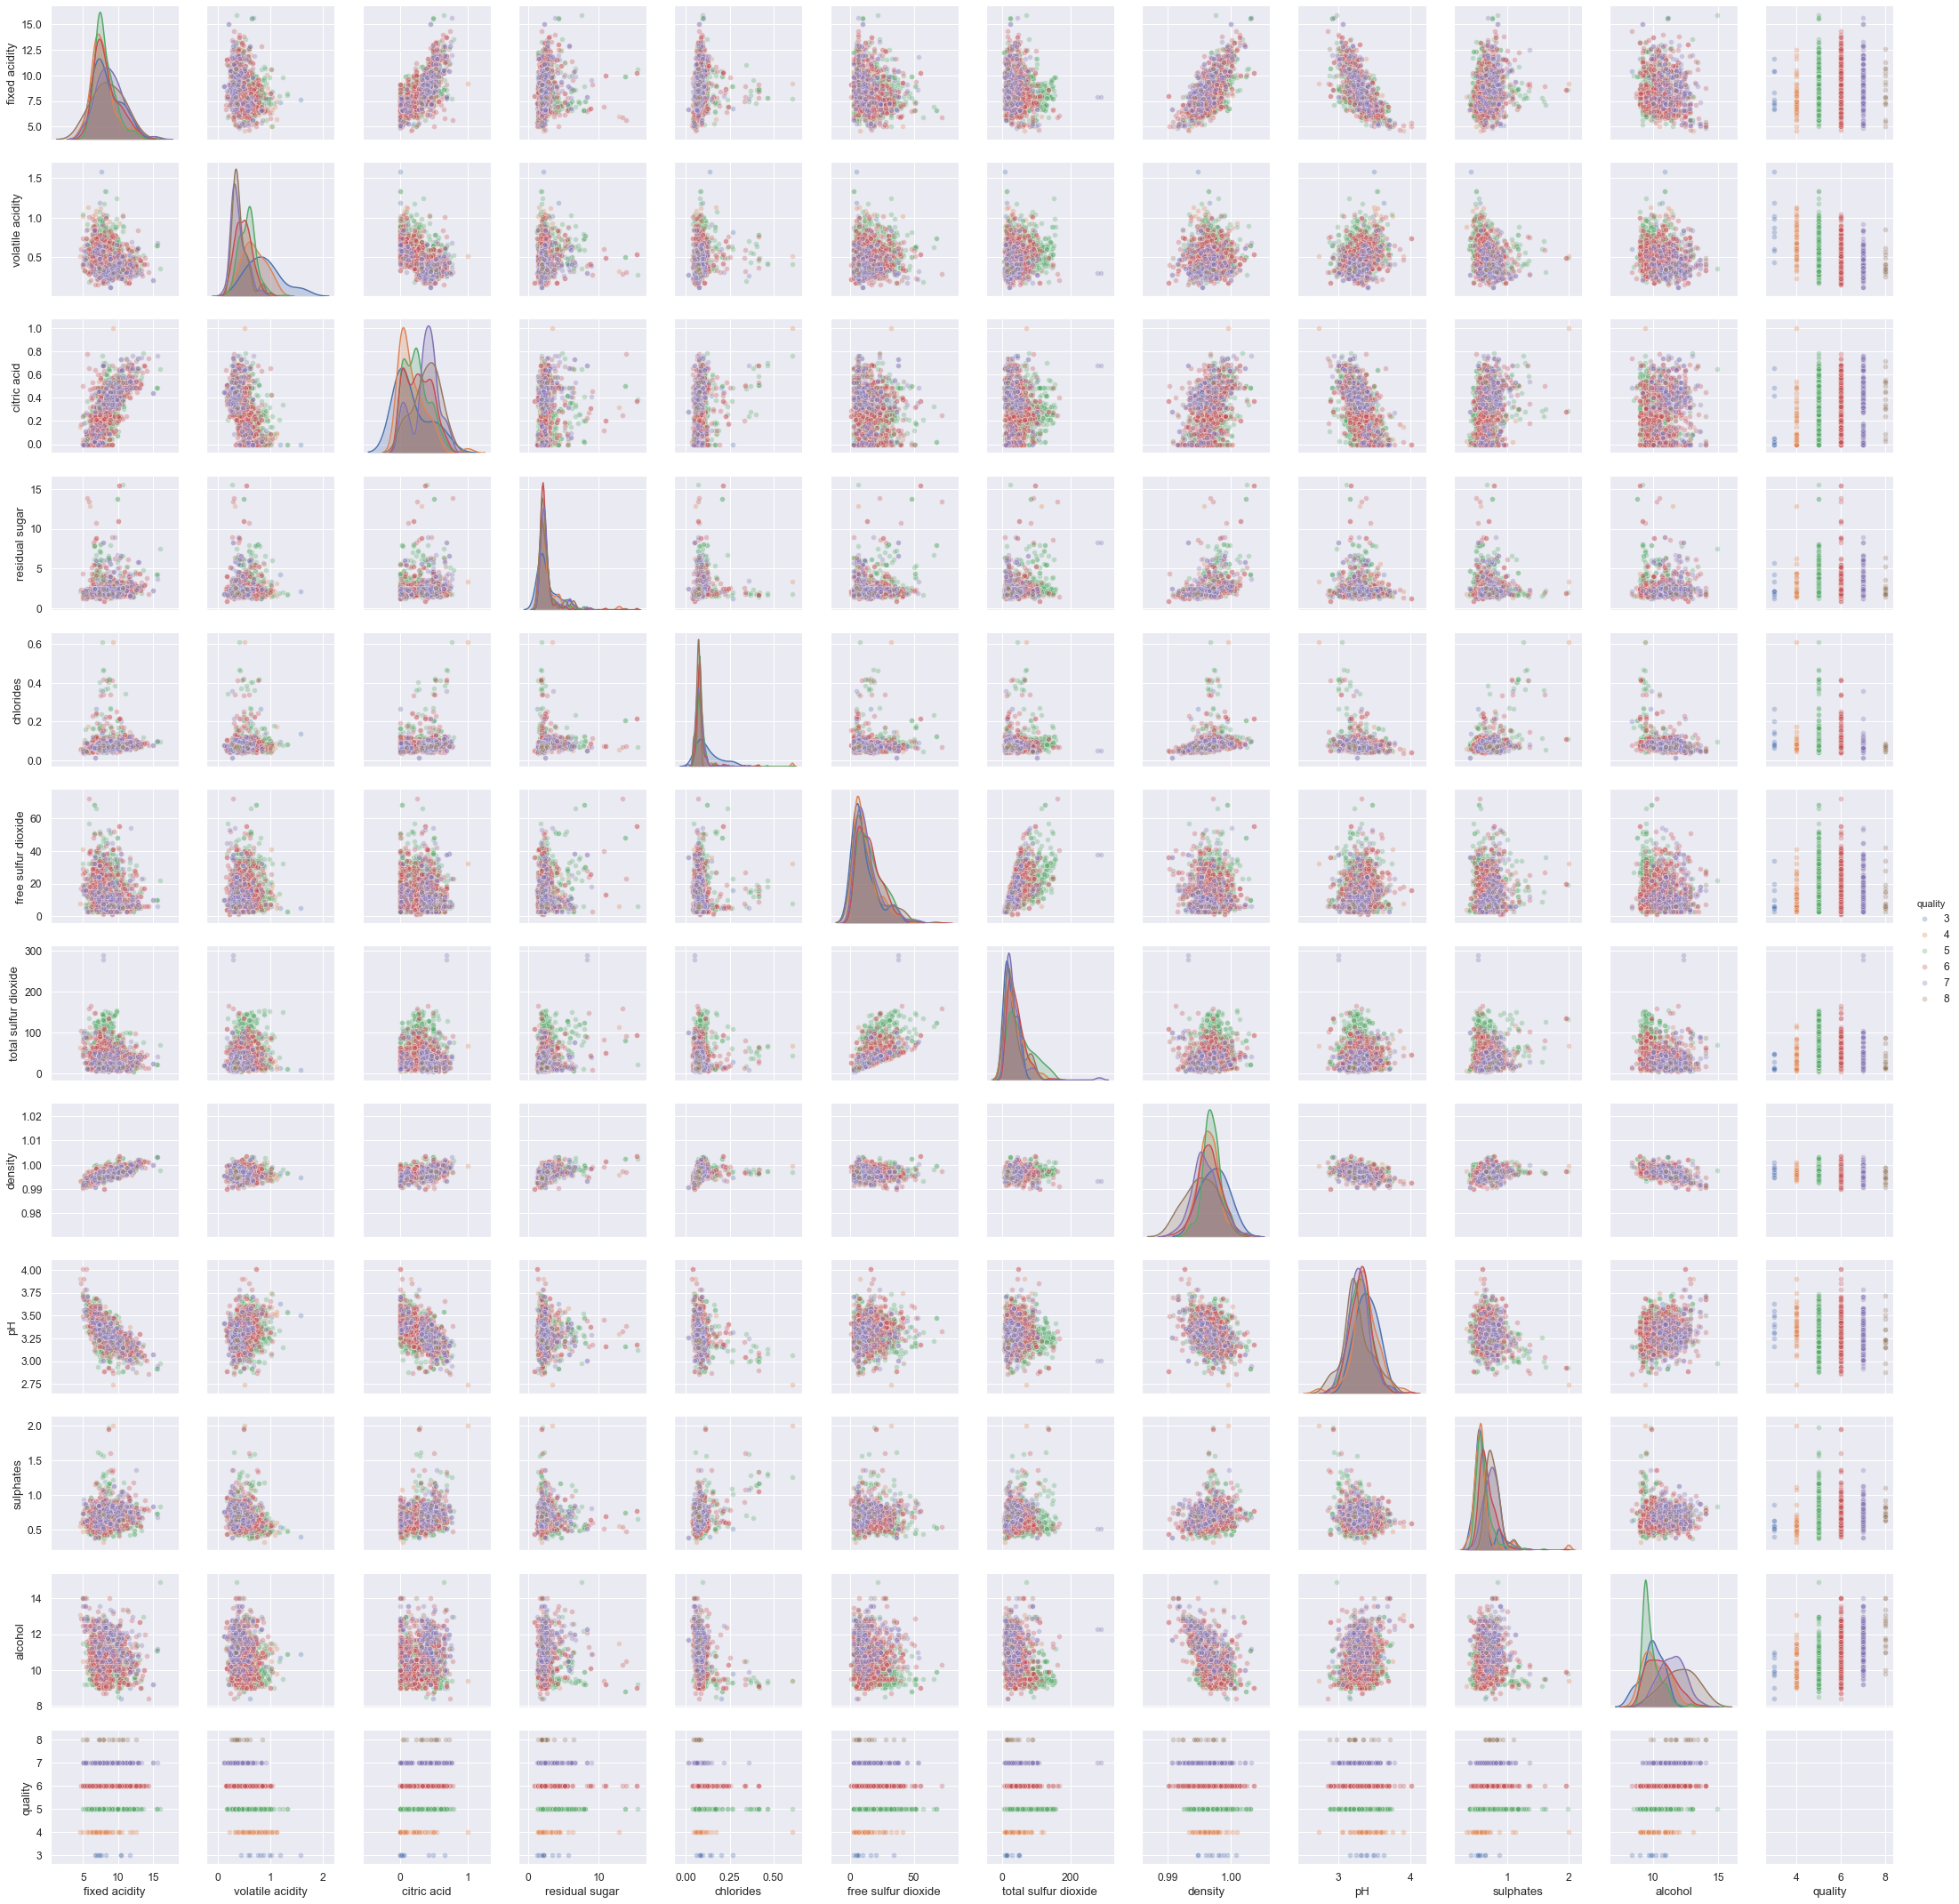

In [60]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = data,plot_kws={'alpha':0.3}, hue = "quality")


Text(0.5, 0.98, 'Boxplot of Quality and Alcohol')

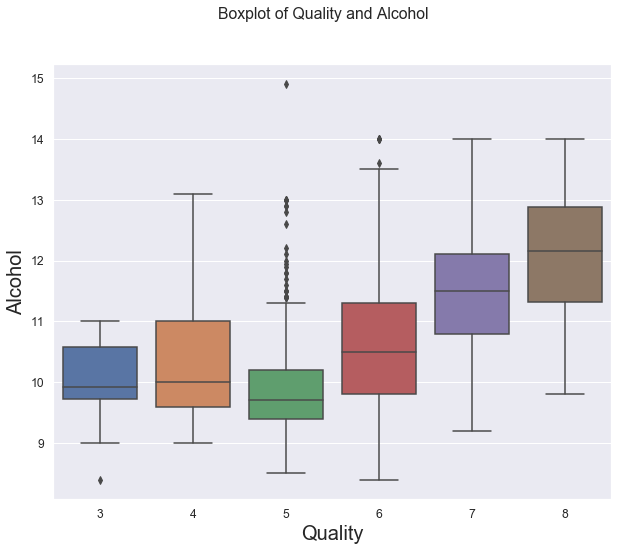

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, x = "quality", y = "alcohol")
plt.xlabel("Quality").set_size(20)
plt.ylabel("Alcohol").set_size(20)
plt.suptitle("Boxplot of Quality and Alcohol")

Text(0.5, 1.0, 'Violin Plot based on Quality and pH')

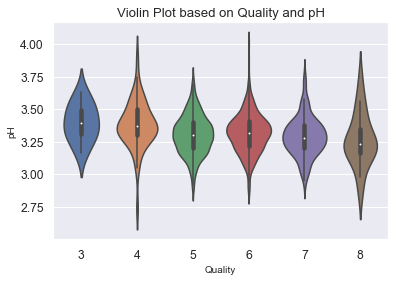

In [63]:
sns.violinplot(data = data, x = "quality", y = "pH")
plt.xlabel("Quality").set_size(10)
plt.ylabel("pH").set_size(10)
plt.title("Violin Plot based on Quality and pH")

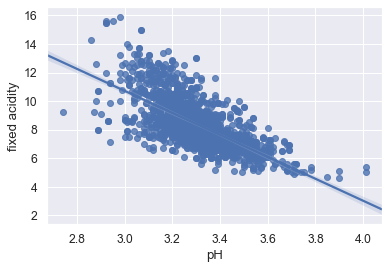

In [67]:
sns.regplot( data = data , x = "pH", y = "fixed acidity")

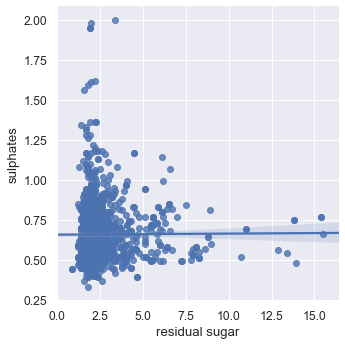

In [68]:
sns.lmplot(data = data, x = "residual sugar", y =  "sulphates")

In [69]:
data['Quality_Group']= pd.cut(data.quality, bins  = [0,3,6,8,10], labels = ['Not Good', 'Average', 'Tastes Good', 'Best'])

In [72]:
data.Quality_Group.value_counts()

Average        1372
Tastes Good     217
Not Good         10
Best              0
Name: Quality_Group, dtype: int64

In [102]:
X = data.iloc[:,:-2].values
y = data.iloc[:,-1].values

## Label Encoding

In [107]:
le = LabelEncoder()

In [108]:
y = le.fit_transform(y)

## Principal Component Analysis

In [126]:
pca = PCA(n_components = 8)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [136]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [138]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([9.48561286e-01, 4.64263108e-02, 2.51642763e-03, 1.56686004e-03,
       8.54121349e-04, 3.59942769e-05, 1.97718297e-05, 9.54972714e-06])

## Feature Scaling

In [141]:
sc = StandardScaler()

In [142]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [144]:
classifier = SVC()

In [145]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [146]:
y_pred = classifier.predict(X_test)

In [156]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       412
           1       0.00      0.00      0.00         1
           2       0.70      0.24      0.36        67

    accuracy                           0.88       480
   macro avg       0.53      0.41      0.43       480
weighted avg       0.86      0.88      0.85       480

[[405   0   7]
 [  1   0   0]
 [ 51   0  16]]
0.8770833333333333


C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression 

In [159]:
lr = LogisticRegression()

In [160]:
lr.fit(X_train, y_train)

C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred = lr.predict(X_test)

In [162]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       412
           1       0.00      0.00      0.00         1
           2       0.53      0.24      0.33        67

    accuracy                           0.86       480
   macro avg       0.47      0.40      0.42       480
weighted avg       0.83      0.86      0.84       480

[[398   0  14]
 [  1   0   0]
 [ 51   0  16]]
0.8625


C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNeighbors Classifier 

In [164]:
knn = KNeighborsClassifier()

In [165]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [166]:
y_pred = knn.predict(X_test)

In [167]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       412
           1       0.00      0.00      0.00         1
           2       0.68      0.45      0.54        67

    accuracy                           0.89       480
   macro avg       0.53      0.47      0.49       480
weighted avg       0.88      0.89      0.88       480

[[398   0  14]
 [  1   0   0]
 [ 37   0  30]]
0.8916666666666667


C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest Classifier 

In [169]:
rfc = RandomForestClassifier()

In [170]:
rfc.fit(X_train, y_train)

C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
y_pred = rfc.predict(X_test)

In [172]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       412
           1       0.00      0.00      0.00         1
           2       0.68      0.39      0.50        67

    accuracy                           0.89       480
   macro avg       0.53      0.45      0.48       480
weighted avg       0.87      0.89      0.87       480

[[400   0  12]
 [  1   0   0]
 [ 41   0  26]]
0.8875


C:\Users\cassin.thangam.edwin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
